In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import glob
import yaml
import os

In [2]:
# load analysis_file
# print table 
# plot curve

In [47]:
def read_analysis(path):
    with open(f"{path}/cifar10c-analysis.yml", "r") as fh:
        analysis = yaml.safe_load(fh)
    name = path.split("/")[-1]
    with open(f"{path}/summary.yml", "r") as fh:
        summary = yaml.safe_load(fh)
        
    arch = summary["model"].split("/")[0]
    
    key = "-".join([arch, summary["class_loss"], summary["strategy"], summary["cov_type"], "M" + str(summary["M"])])

    rows = []
    
    for cat in analysis["categories"]:
        for r in analysis["categories"][cat]:
            
            acc = r["metrics"][1]            
            assert 12 == acc["L"]
            
            rows.append(dict(
                beta=summary['beta'],
                name=name,
                category=cat,
                severity=r["severity"],
                accuracy=acc["accuracy"],
                key=key,
                model=arch,
                strategy=summary["strategy"],
                class_loss=summary["class_loss"],
                cov_type=summary["cov_type"],
                M=summary["M"],
                clean_accuracy=summary["metrics"]["test"]["accuracy_L12"]
            ))
            
    return rows
       
read_analysis("../artifacts-server/mpg-server/experiment-robustness-cifar10-beta03/cifar10-various-opts-M1/resnet20-vdb-diag-cifar10--2019-12-27--05-08-49-724942")

[{'beta': 0.001,
  'name': 'resnet20-vdb-diag-cifar10--2019-12-27--05-08-49-724942',
  'category': 'brightness',
  'severity': 1,
  'accuracy': 0.7859999537467957,
  'key': 'resnet20-vdb-oneshot-diag-M1',
  'model': 'resnet20',
  'strategy': 'oneshot',
  'class_loss': 'vdb',
  'cov_type': 'diag',
  'M': 1,
  'clean_accuracy': 0.7878000736236572},
 {'beta': 0.001,
  'name': 'resnet20-vdb-diag-cifar10--2019-12-27--05-08-49-724942',
  'category': 'brightness',
  'severity': 2,
  'accuracy': 0.7818999886512756,
  'key': 'resnet20-vdb-oneshot-diag-M1',
  'model': 'resnet20',
  'strategy': 'oneshot',
  'class_loss': 'vdb',
  'cov_type': 'diag',
  'M': 1,
  'clean_accuracy': 0.7878000736236572},
 {'beta': 0.001,
  'name': 'resnet20-vdb-diag-cifar10--2019-12-27--05-08-49-724942',
  'category': 'brightness',
  'severity': 3,
  'accuracy': 0.7699999809265137,
  'key': 'resnet20-vdb-oneshot-diag-M1',
  'model': 'resnet20',
  'strategy': 'oneshot',
  'class_loss': 'vdb',
  'cov_type': 'diag',
  'M

In [50]:
def read_experiment_metrics(directory):
    models = glob.glob(f"{directory}/summary.yml")
    
    models = list(map(lambda x: os.path.dirname(x), models))
    
    rows = []
    
    for m in models:
        
        rows.extend(read_analysis(m))
        
    return pd.DataFrame(rows)
    
df_resnet_cifar10c = read_experiment_metrics("../artifacts-server/mpg-server/experiment-robustness-cifar10-beta03/*/*")

In [51]:
df_resnet_cifar10c

,beta,name,category,severity,accuracy,key,model,strategy,class_loss,cov_type,M,clean_accuracy
0,0.001,resnet20-vdb-diag-cifar10--2019-12-27--07-11-5...,brightness,1,0.7830,resnet20-vdb-oneshot-diag-M12,resnet20,oneshot,vdb,diag,12,0.7898
1,0.001,resnet20-vdb-diag-cifar10--2019-12-27--07-11-5...,brightness,2,0.7777,resnet20-vdb-oneshot-diag-M12,resnet20,oneshot,vdb,diag,12,0.7898
2,0.001,resnet20-vdb-diag-cifar10--2019-12-27--07-11-5...,brightness,3,0.7649,resnet20-vdb-oneshot-diag-M12,resnet20,oneshot,vdb,diag,12,0.7898
3,0.001,resnet20-vdb-diag-cifar10--2019-12-27--07-11-5...,brightness,4,0.7457,resnet20-vdb-oneshot-diag-M12,resnet20,oneshot,vdb,diag,12,0.7898
4,0.001,resnet20-vdb-diag-cifar10--2019-12-27--07-11-5...,brightness,5,0.6978,resnet20-vdb-oneshot-diag-M12,resnet20,oneshot,vdb,diag,12,0.7898
...,...,...,...,...,...,...,...,...,...,...,...,...
4555,0.001,resnet20-vdb-diag-cifar10--2020-01-11--08-23-3...,zoom_blur,1,0.6697,resnet20-vdb-algo2/k:20-diag-M6,resnet20,algo2/k:20,vdb,diag,6,0.8186
4556,0.001,resnet20-vdb-diag-cifar10--2020-01-11--08-23-3...,zoom_blur,2,0.6315,resnet20-vdb-algo2/k:20-diag-M6,resnet20,algo2/k:20,vdb,diag,6,0.8186
4557,0.001,resnet20-vdb-diag-cifar10--2020-01-11--08-23-3...,zoom_blur,3,0.5753,resnet20-vdb-algo2/k:20-diag-M6,resnet20,algo2/k:20,vdb,diag,6,0.8186
4558,0.001,resnet20-vdb-diag-cifar10--2020-01-11--08-23-3...,zoom_blur,4,0.5298,resnet20-vdb-algo2/k:20-diag-M6,resnet20,algo2/k:20,vdb,diag,6,0.8186


In [52]:
df_resnet_cifar10c[
    (df_resnet_cifar10c.severity == 1) 
    & (df_resnet_cifar10c.category == "zoom_blur") 
].groupby(["class_loss", "M", "strategy"])["model"].count()

class_loss  M   strategy  
vdb         1   algo2/k:10    4
                algo2/k:20    4
                algo2/k:5     4
                oneshot       4
            6   algo2/k:10    4
                algo2/k:20    4
                algo2/k:5     4
                oneshot       4
            12  algo2/k:10    4
                algo2/k:20    4
                algo2/k:5     4
                oneshot       4
Name: model, dtype: int64

In [53]:
def print_table(df, category, severity, strategies=["oneshot", "algo2/k:10"], should_print=False):
    metric = "accuracy"
    df = df[ df.strategy.isin(strategies) & (df.category == category) & (df.severity == severity)]

    print(f"Print table: {category}-{severity}")

    df = df.groupby(["strategy", "M"])\
        .agg(mean=(metric, "mean"), std=(metric, "std"))\
        .reset_index()
    
    
    df["temp"] = df[['mean', 'std']].apply(lambda x: "%.2f±%.4f\%%" % (x[0]*100, x[1]*100), axis=1) 

    df = df.drop(columns=["mean", "std"])\
        .rename(columns={"temp": f"{metric} | {category} (severity {severity})"}) \
        .pivot(index="strategy", columns="M")\
        .sort_values(by="strategy", ascending=False)
    
    if should_print:
        print("")
        print(df.to_latex(column_format="rcccc", escape=False))
        print("")
    return df

print_table(df_resnet_cifar10c, "brightness", 1, should_print=True)

Print table: brightness-1

\begin{tabular}{rcccc}
\toprule
{} & \multicolumn{3}{l}{accuracy | brightness (severity 1)} \\
M &                                 1  &              6  &              12 \\
strategy   &                                    &                 &                 \\
\midrule
oneshot    &                     80.62±1.6822\% &  79.57±3.2791\% &  80.36±1.5246\% \\
algo2/k:10 &                     80.29±0.5089\% &  81.61±1.6545\% &  80.80±1.5010\% \\
\bottomrule
\end{tabular}




accuracy | brightness (severity 1)                                
M                                          1               6               12
strategy                                                                     
oneshot                        80.62±1.6822\%  79.57±3.2791\%  80.36±1.5246\%
algo2/k:10                     80.29±0.5089\%  81.61±1.6545\%  80.80±1.5010\%

In [54]:
# def print_category(df, cat, severities=range(1,6)):
#     for s in severities:
#         print_table(df, cat, s, should_print=True)
        
# print_category(df_resnet_cifar10c, "contrast")

In [55]:
df_resnet_cifar10c_vib = read_experiment_metrics("../artifacts-server/mpg-server/experiment-robustness-cifar10-beta03-vib/*/*")
df_resnet_cifar10c_vib

,beta,name,category,severity,accuracy,key,model,strategy,class_loss,cov_type,M,clean_accuracy
0,0.001,resnet20-vib-diag-cifar10--2019-12-26--23-23-3...,brightness,1,0.8226,resnet20-vib-oneshot-diag-M12,resnet20,oneshot,vib,diag,12,0.8249
1,0.001,resnet20-vib-diag-cifar10--2019-12-26--23-23-3...,brightness,2,0.8158,resnet20-vib-oneshot-diag-M12,resnet20,oneshot,vib,diag,12,0.8249
2,0.001,resnet20-vib-diag-cifar10--2019-12-26--23-23-3...,brightness,3,0.8059,resnet20-vib-oneshot-diag-M12,resnet20,oneshot,vib,diag,12,0.8249
3,0.001,resnet20-vib-diag-cifar10--2019-12-26--23-23-3...,brightness,4,0.7924,resnet20-vib-oneshot-diag-M12,resnet20,oneshot,vib,diag,12,0.8249
4,0.001,resnet20-vib-diag-cifar10--2019-12-26--23-23-3...,brightness,5,0.7566,resnet20-vib-oneshot-diag-M12,resnet20,oneshot,vib,diag,12,0.8249
...,...,...,...,...,...,...,...,...,...,...,...,...
1135,0.001,resnet20-vib-diag-cifar10--2020-01-09--10-09-5...,zoom_blur,1,0.6350,resnet20-vib-algo2/k:5-diag-M6,resnet20,algo2/k:5,vib,diag,6,0.8201
1136,0.001,resnet20-vib-diag-cifar10--2020-01-09--10-09-5...,zoom_blur,2,0.5973,resnet20-vib-algo2/k:5-diag-M6,resnet20,algo2/k:5,vib,diag,6,0.8201
1137,0.001,resnet20-vib-diag-cifar10--2020-01-09--10-09-5...,zoom_blur,3,0.5324,resnet20-vib-algo2/k:5-diag-M6,resnet20,algo2/k:5,vib,diag,6,0.8201
1138,0.001,resnet20-vib-diag-cifar10--2020-01-09--10-09-5...,zoom_blur,4,0.4874,resnet20-vib-algo2/k:5-diag-M6,resnet20,algo2/k:5,vib,diag,6,0.8201


In [56]:
df_resnet_cifar10c_vib[
    (df_resnet_cifar10c_vib.severity == 1) 
    & (df_resnet_cifar10c_vib.category == "zoom_blur") 
].groupby(["class_loss", "strategy", "M"])["model"].count()

class_loss  strategy   M 
vib         algo2/k:5  6     4
                       12    4
            oneshot    12    4
Name: model, dtype: int64

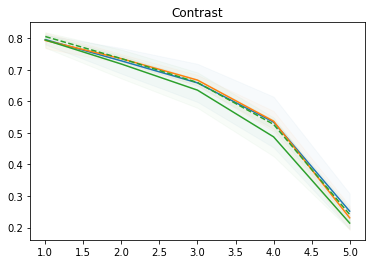

In [57]:
cm = plt.get_cmap('tab10')
color_indices = dict(zip([1, 6, 12], range(3)))


def _plot_compute_stats(df):
    return df.groupby("severity")\
            .agg(mean_acc=("accuracy", "mean"), std_acc=("accuracy", "std"))\
            .reset_index()

def plot_robustness_category(df_vdb, df_vib, strategy, category, M=[1, 6, 12], alpha=0.03, first_one_ls="-"):

    
    for label, df_curr in zip(["vdb-M", "vib-M'"], [df_vdb, df_vib]):
        if df_curr is None:
            continue
            
        df_curr = df_curr[ (df_curr.strategy == strategy) & (df_curr.category == category)]
        
        for m in sorted(set(df_curr.M.unique()).intersection(M)):
            color = cm.colors[color_indices[m]]

            df_ = _plot_compute_stats(df_curr[df_curr.M==m])

            mean, std = df_.mean_acc.values, df_.std_acc.values

            plt.plot(df_.severity, mean, label=f"{label}{m}-{strategy}", color=color, ls=first_one_ls if label=="vdb-M" else "--")
            plt.fill_between(df_.severity, mean-std, mean+std, alpha=alpha, color=color)

    
    plt.title(category.replace("_", " ").title())
    
plot_robustness_category(df_resnet_cifar10c, df_resnet_cifar10c_vib, "oneshot", "contrast")

# Viz CIFAR10-C Per Category

Plotting with 3 cols and 5 rows


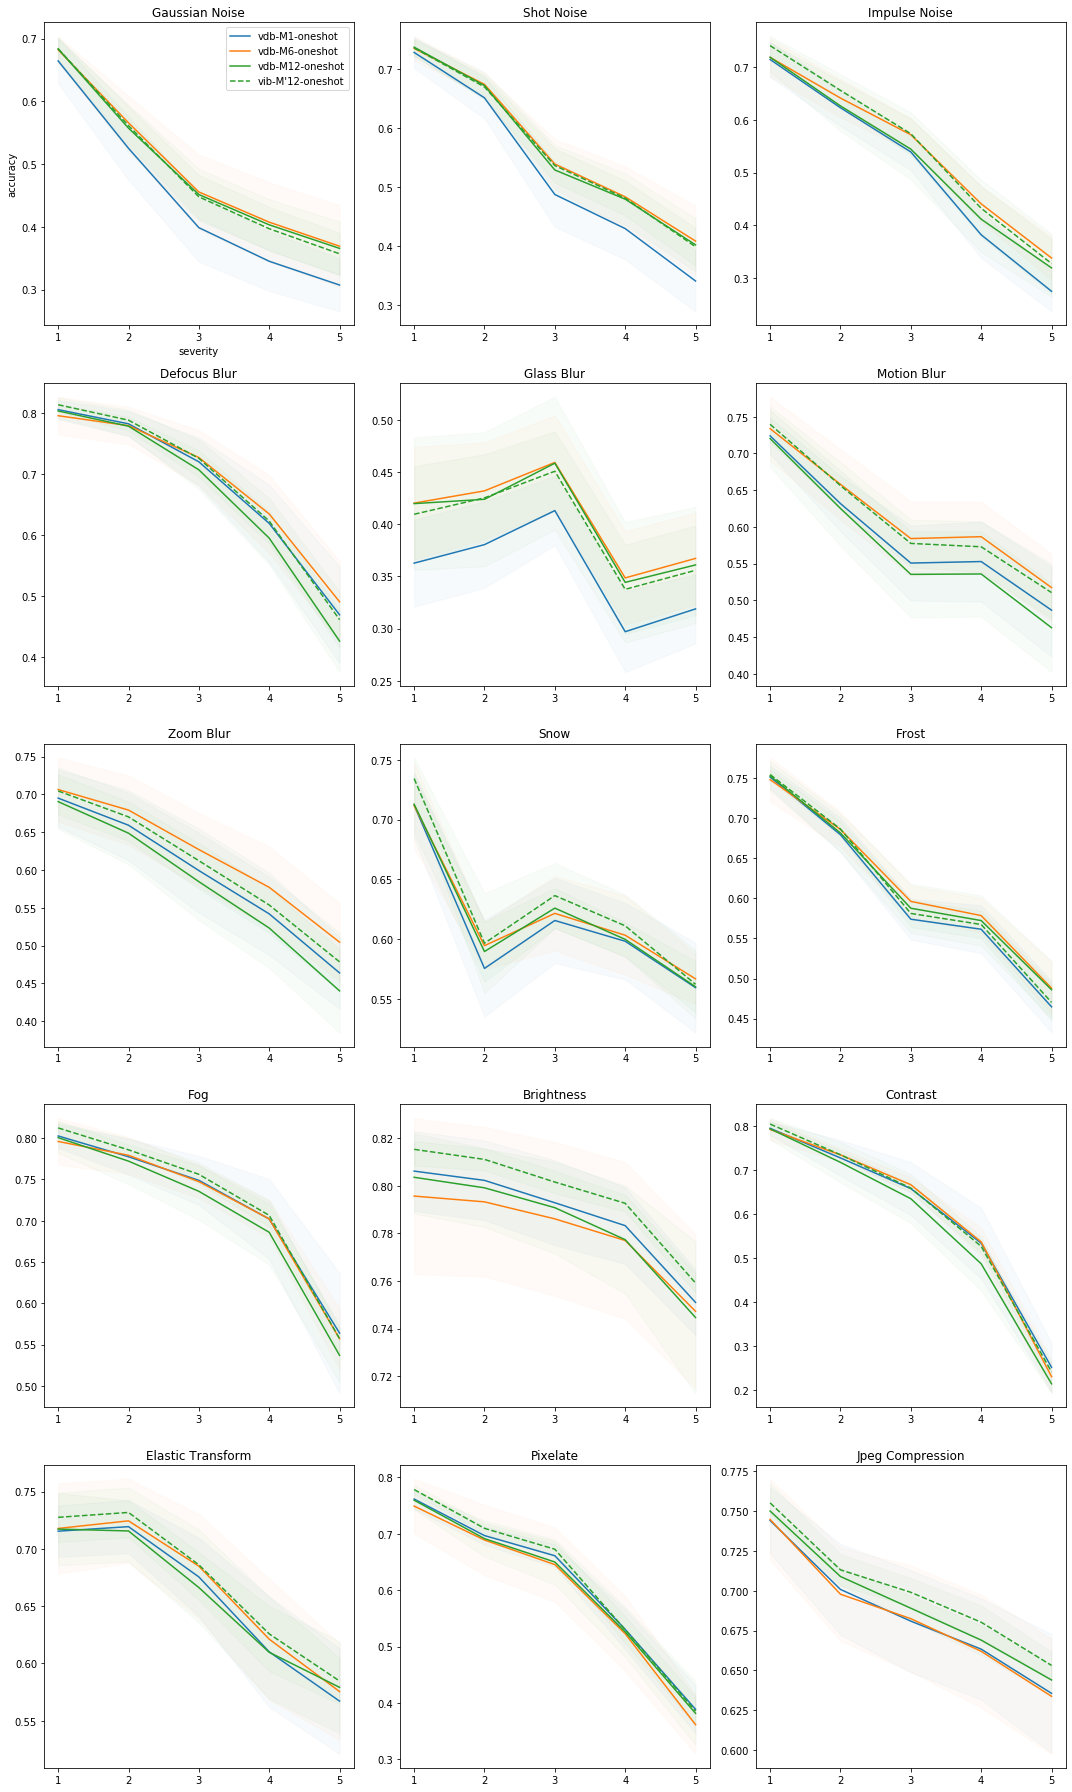

In [58]:

cifar10c_categories = """
gaussian_noise
shot_noise
impulse_noise
defocus_blur
glass_blur
motion_blur
zoom_blur
snow
frost
fog
brightness
contrast
elastic_transform
pixelate
jpeg_compression
""".strip().split("\n")

cifar10c_categories

def plot_cifar10c(df_vdb, df_vib, strategy, cifar10c_categories):
    total_categories = len(cifar10c_categories)
    cols = 3
    rows = total_categories // cols 
    
    print(f"Plotting with {cols} cols and {rows} rows")

    plt.figure(figsize=(5*cols, 5*rows))
    
    for i, cat in enumerate(cifar10c_categories):
        plt.subplot(rows, cols, i+1)
        
        if strategy != "oneshot":
            plot_robustness_category(df_vdb, df_vib, "oneshot", cat, M=[1, 6, 12], first_one_ls=":")


        plot_robustness_category(df_vdb, df_vib, strategy, cat)

        if i == 0:
            plt.legend()

            plt.xlabel("severity")
            plt.ylabel("accuracy")
            
        plt.xticks(range(1, 6))

    plt.tight_layout()
    
plot_cifar10c(df_resnet_cifar10c, df_resnet_cifar10c_vib, "oneshot", cifar10c_categories)

Plotting with 3 cols and 5 rows


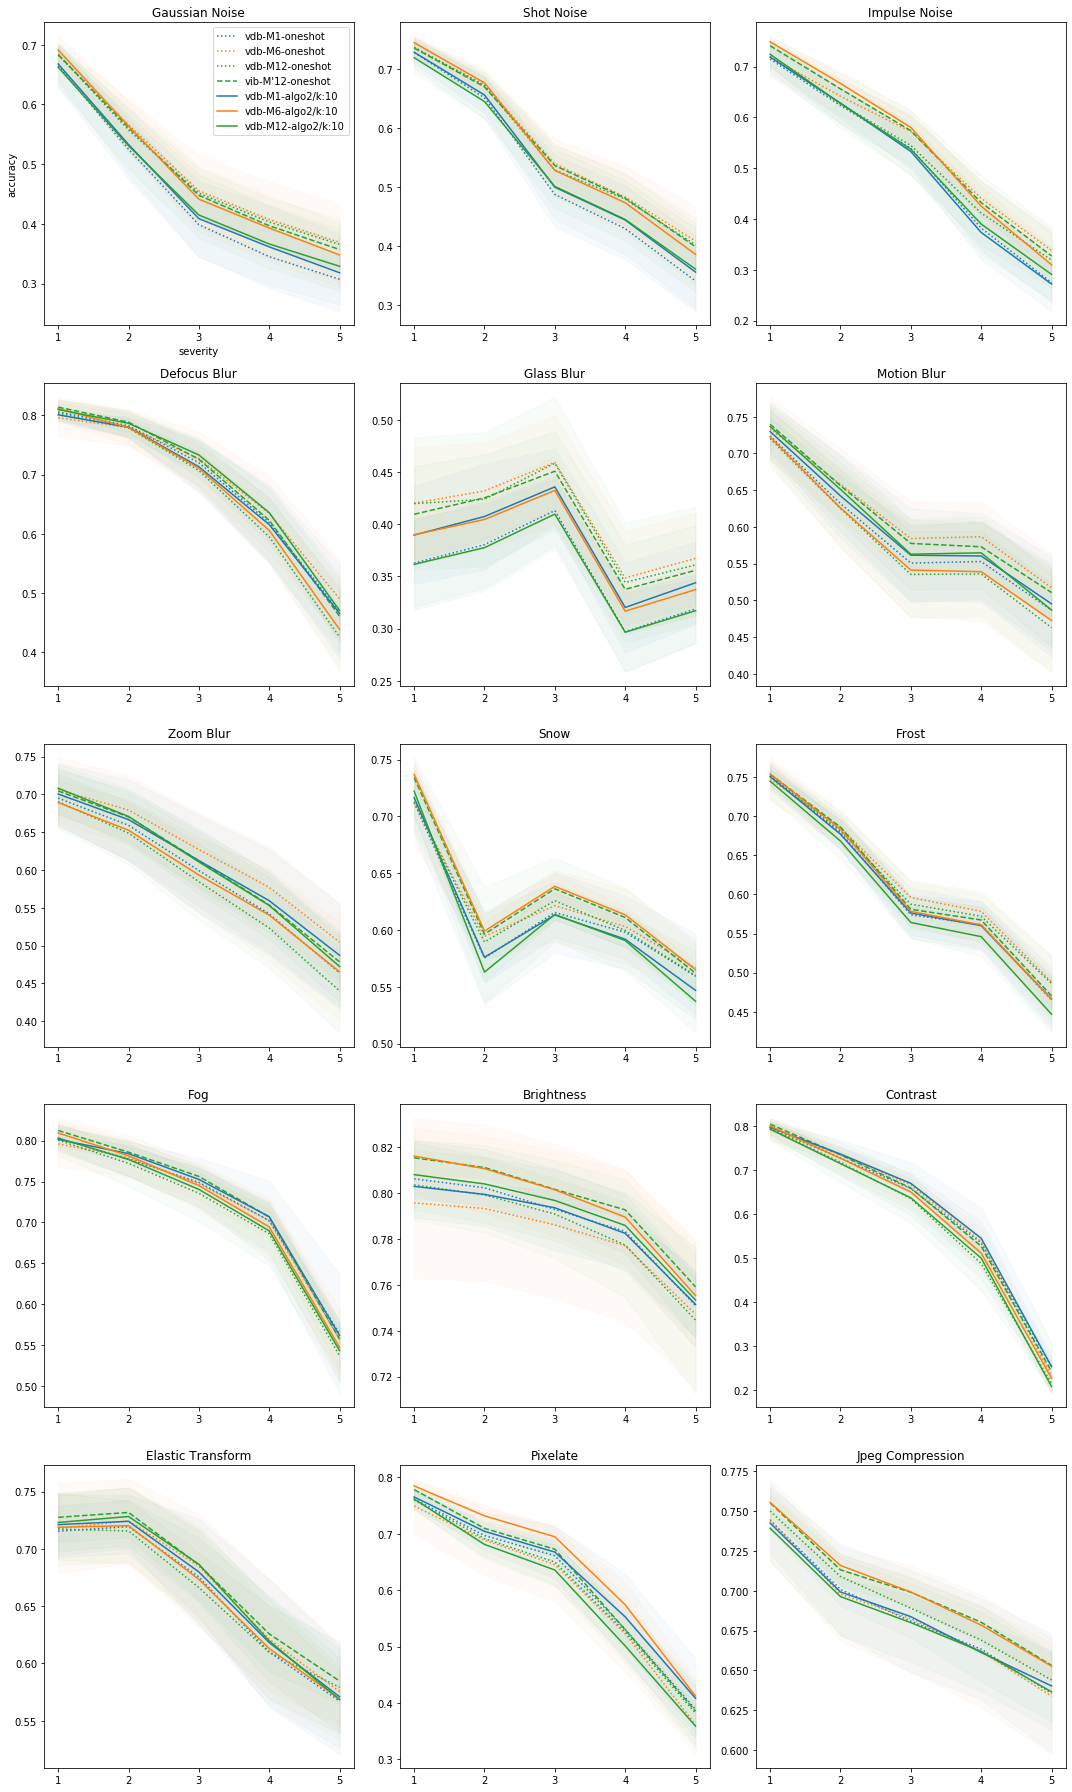

In [59]:
plot_cifar10c(df_resnet_cifar10c, df_resnet_cifar10c_vib, "algo2/k:10", cifar10c_categories)
# plt.savefig("./figures/cifar10c-results.pdf", quality=100)

# Compute mCE and relative mCE erros

In [60]:
def compute_corruption_error(df, ref_key, strategies=["oneshot", "algo2/k:10"]):
    group_key = ["key", "category"]
    df = df[df.strategy.isin(strategies) & df.category.isin(cifar10c_categories)].copy()
    
    df["error"] = 100*(1-df["accuracy"])
    df["error_clean"] = 100*(1-df["clean_accuracy"])

    df_agg_err = df[(df.category == "brightness") & (df.severity == 1)]\
        .groupby(["key"])\
        .agg(mean_err=("error_clean", "mean"), std_err=("error_clean", "std"))\
        .reset_index()
    
    df_agg_err["mean_std"] = df_agg_err[["mean_err", "std_err"]].apply(lambda x: "%.2f±%.2f\%%" % (x[0], x[1]), axis=1) 


    
    # sum error over all severity levels
    df = df.groupby(["name", "category", "key"])\
        .agg(
            sum_error=("error", "sum"),
            clean_error=("error_clean", "mean") # this error_clean are the same for each model; hence getting mean is equal to the value
        )\
        .reset_index()
  
    # calculate relative_error for each run
    df["rel_sum_error"] = df["sum_error"] - df["clean_error"]

    
    # sum reference metrics over all runs 
    df_ref_setting = df[df.key == ref_key].groupby(group_key)\
        .agg(ref_sum_error=("sum_error", "sum"), ref_rel_sum_error=("rel_sum_error", "sum")) \
        .reset_index()
    
    
    # sun metrics over all runs
    df_other_models = df.groupby(group_key) \
        .agg(sum_error=("sum_error", "sum"), rel_sum_error=("rel_sum_error", "sum")) \
        .reset_index()

    
    df_result = df_other_models.merge(df_ref_setting[["category", "ref_sum_error", "ref_rel_sum_error"]], on="category")
    
    # compute CE, rel CE per category
    df_result["ce"] = 100*df_result["sum_error"] / df_result["ref_sum_error"]
    df_result["rel_ce"] = 100* df_result["rel_sum_error"] / df_result["ref_rel_sum_error"]

    return df_result.groupby(["key"])\
        .agg(
            mCe=("ce", "mean"),
            rel_mCe=("rel_ce", "mean"), 
        ).merge(df_agg_err[["key", "mean_std"]], on="key")[["key", "mean_std", "mCe", "rel_mCe"]]

df_temp = compute_corruption_error(
    pd.concat([df_resnet_cifar10c, df_resnet_cifar10c_vib], ignore_index=True, sort=False),
    "resnet20-vdb-oneshot-diag-M1",
)

df_temp

with pd.option_context('display.float_format', '{:0.2f}'.format):

#     print(df_temp.to_latex(escape=False))
    pass

df_temp
# df_temp[df_temp.key =="resnet20-oneshot-vdb-diag-M6"].rel_ce.mean()

,key,mean_std,mCe,rel_mCe
0,resnet20-vdb-algo2/k:10-diag-M1,19.75±0.51\%,98.846790,98.426532
1,resnet20-vdb-algo2/k:10-diag-M12,18.90±1.52\%,100.199266,100.423281
2,resnet20-vdb-algo2/k:10-diag-M6,18.20±1.48\%,97.462484,97.820498
3,resnet20-vdb-oneshot-diag-M1,19.23±1.74\%,100.000000,100.000000
4,resnet20-vdb-oneshot-diag-M12,19.62±1.08\%,99.546016,99.346121
5,resnet20-vdb-oneshot-diag-M6,20.43±3.17\%,96.914593,95.952788
6,resnet20-vib-oneshot-diag-M12,18.36±0.82\%,95.927219,96.014607


In [73]:
def plot_table(path_1, path_2, should_print=False, **kwargs):
    df = read_experiment_metrics(path_1)

    print(
        df[
            (df.severity == 1) 
            & (df.category == "zoom_blur") 
        ].groupby(["class_loss", "strategy", "M"])["model"].count()
    )
    
    df_vib = read_experiment_metrics(path_2)
    print(
        df_vib[
            (df_vib.severity == 1) 
            & (df_vib.category == "zoom_blur") 
        ].groupby(["class_loss", "strategy", "M"])["model"].count()
    )

    beta = df.beta.unique()
    
    assert len(beta) == 1 and np.equal(df.beta.unique(), df_vib.beta.unique()), print(beta)
    print("β", beta)
    
    df_res = compute_corruption_error(
    pd.concat([df, df_vib], ignore_index=True, sort=False),
        "resnet20-vdb-oneshot-diag-M1",
        **kwargs
    )
    
    if should_print:
        with pd.option_context('display.float_format', '{:0.2f}'.format):
            print(df_res.to_latex(escape=False))
    
    return df_res

plot_table(
    "../artifacts-server/mpg-server/experiment-robustness-cifar10-beta03/*/*",
    "../artifacts-server/mpg-server/experiment-robustness-cifar10-beta03-vib/*/*",
    should_print=True,
    strategies=["oneshot", "algo2/k:5", "algo2/k:10", "algo2/k:20"],
)

class_loss  strategy    M 
vdb         algo2/k:10  1     4
                        6     4
                        12    4
            algo2/k:20  1     4
                        6     4
                        12    4
            algo2/k:5   1     4
                        6     4
                        12    4
            oneshot     1     4
                        6     4
                        12    4
Name: model, dtype: int64
class_loss  strategy  M 
vib         oneshot   6     4
                      12    4
Name: model, dtype: int64
β [0.001]
\begin{tabular}{lllrr}
\toprule
{} &                               key &      mean_std &    mCe &  rel_mCe \\
\midrule
0  &   resnet20-vdb-algo2/k:10-diag-M1 &  19.75±0.51\% &  98.85 &    98.43 \\
1  &  resnet20-vdb-algo2/k:10-diag-M12 &  18.90±1.52\% & 100.20 &   100.42 \\
2  &   resnet20-vdb-algo2/k:10-diag-M6 &  18.20±1.48\% &  97.46 &    97.82 \\
3  &   resnet20-vdb-algo2/k:20-diag-M1 &  19.86±0.94\% &  99.29 &    98.86 \\
4  &  resne

,key,mean_std,mCe,rel_mCe
0,resnet20-vdb-algo2/k:10-diag-M1,19.75±0.51\%,98.846790,98.426532
1,resnet20-vdb-algo2/k:10-diag-M12,18.90±1.52\%,100.199266,100.423281
2,resnet20-vdb-algo2/k:10-diag-M6,18.20±1.48\%,97.462484,97.820498
3,resnet20-vdb-algo2/k:20-diag-M1,19.86±0.94\%,99.285527,98.860970
4,resnet20-vdb-algo2/k:20-diag-M12,18.38±1.02\%,96.566079,96.686414
5,resnet20-vdb-algo2/k:20-diag-M6,20.79±3.79\%,105.830052,105.668279
6,resnet20-vdb-algo2/k:5-diag-M1,18.73±1.08\%,98.849005,99.010104
7,resnet20-vdb-algo2/k:5-diag-M12,19.98±1.17\%,101.041455,100.790640
8,resnet20-vdb-algo2/k:5-diag-M6,18.57±0.79\%,97.224043,97.324360
9,resnet20-vdb-oneshot-diag-M1,19.23±1.74\%,100.000000,100.000000


In [71]:
plot_table(
    "../artifacts-server/mpg-server/experiment-robustness-cifar10-beta02/*/*",
    "../artifacts-server/mpg-server/experiment-robustness-cifar10-beta02-vib/*/*",
    should_print=True,
    strategies=["oneshot", "algo2/k:5", "algo2/k:10", "algo2/k:20"],
)

class_loss  strategy    M 
vdb         algo2/k:10  1     4
                        6     4
                        12    4
            algo2/k:20  1     4
                        6     4
                        12    4
            algo2/k:5   1     4
                        6     4
                        12    4
            oneshot     1     4
                        6     4
                        12    4
Name: model, dtype: int64
class_loss  strategy  M 
vib         oneshot   6     4
                      12    4
Name: model, dtype: int64
β [0.01]
\begin{tabular}{lllrr}
\toprule
{} &                               key &      mean_std &    mCe &  rel_mCe \\
\midrule
0  &   resnet20-vdb-algo2/k:10-diag-M1 &  19.36±0.36\% & 102.72 &   103.08 \\
1  &  resnet20-vdb-algo2/k:10-diag-M12 &  19.71±1.41\% & 103.85 &   104.05 \\
2  &   resnet20-vdb-algo2/k:10-diag-M6 &  19.39±1.37\% &  98.01 &    97.81 \\
3  &   resnet20-vdb-algo2/k:20-diag-M1 &  18.06±0.74\% &  99.80 &   100.44 \\
4  &  resnet

,key,mean_std,mCe,rel_mCe
0,resnet20-vdb-algo2/k:10-diag-M1,19.36±0.36\%,102.716167,103.082979
1,resnet20-vdb-algo2/k:10-diag-M12,19.71±1.41\%,103.847258,104.050925
2,resnet20-vdb-algo2/k:10-diag-M6,19.39±1.37\%,98.010696,97.805288
3,resnet20-vdb-algo2/k:20-diag-M1,18.06±0.74\%,99.796894,100.435866
4,resnet20-vdb-algo2/k:20-diag-M12,18.64±1.90\%,99.802936,100.141605
5,resnet20-vdb-algo2/k:20-diag-M6,19.53±1.31\%,100.570079,100.526407
6,resnet20-vdb-algo2/k:5-diag-M1,19.20±1.51\%,105.390883,106.058024
7,resnet20-vdb-algo2/k:5-diag-M12,17.94±0.81\%,95.799749,96.150566
8,resnet20-vdb-algo2/k:5-diag-M6,20.55±1.90\%,106.409216,106.392113
9,resnet20-vdb-oneshot-diag-M1,19.35±1.18\%,100.000000,100.000000


In [66]:
plot_table(
    "../artifacts-server/mpg-server/experiment-robustness-cifar10-beta04/*/*",
    "../artifacts-server/mpg-server/experiment-robustness-cifar10-beta04-vib/*/*",
    should_print=True,
    strategies=["oneshot", "algo2/k:5", "algo2/k:10", "algo2/k:20"],
)

class_loss  strategy    M 
vdb         algo2/k:10  1     4
                        6     4
                        12    4
            algo2/k:20  1     4
                        6     4
                        12    4
            algo2/k:5   1     4
                        6     4
                        12    4
            oneshot     1     4
                        6     4
                        12    4
Name: model, dtype: int64
class_loss  strategy  M 
vib         oneshot   6     4
                      12    4
Name: model, dtype: int64
β [0.0001]
\begin{tabular}{lllrr}
\toprule
{} &                               key &      mean_std &    mCe &  rel_mCe \\
\midrule
0  &   resnet20-vdb-algo2/k:10-diag-M1 &  20.41±1.39\% &  99.54 &    99.59 \\
1  &  resnet20-vdb-algo2/k:10-diag-M12 &  19.05±0.83\% &  95.87 &    96.23 \\
2  &   resnet20-vdb-algo2/k:10-diag-M6 &  20.88±0.39\% &  98.51 &    98.15 \\
3  &   resnet20-vdb-algo2/k:20-diag-M1 &  18.91±0.73\% &  99.86 &   100.77 \\
4  &  resn

,key,mean_std,mCe,rel_mCe
0,resnet20-vdb-algo2/k:10-diag-M1,20.41±1.39\%,99.538393,99.594439
1,resnet20-vdb-algo2/k:10-diag-M12,19.05±0.83\%,95.868378,96.234563
2,resnet20-vdb-algo2/k:10-diag-M6,20.88±0.39\%,98.509167,98.151093
3,resnet20-vdb-algo2/k:20-diag-M1,18.91±0.73\%,99.857496,100.768773
4,resnet20-vdb-algo2/k:20-diag-M12,18.99±1.02\%,96.744064,97.296507
5,resnet20-vdb-algo2/k:20-diag-M6,19.24±1.32\%,99.959941,100.714000
6,resnet20-vdb-algo2/k:5-diag-M1,18.90±0.50\%,98.175598,98.933176
7,resnet20-vdb-algo2/k:5-diag-M12,20.17±1.14\%,103.385422,104.068452
8,resnet20-vdb-algo2/k:5-diag-M6,20.40±2.24\%,101.069461,101.331246
9,resnet20-vdb-oneshot-diag-M1,20.69±1.79\%,100.000000,100.000000


In [67]:
plot_table(
    "../artifacts-server/mpg-server/experiment-robustness-cifar10-beta05/*/*",
    "../artifacts-server/mpg-server/experiment-robustness-cifar10-beta05-vib/*/*",
    should_print=True,
    strategies=["oneshot", "algo2/k:5", "algo2/k:10", "algo2/k:20"],
)

class_loss  strategy    M 
vdb         algo2/k:10  1     4
                        6     4
                        12    4
            algo2/k:20  1     4
                        6     4
                        12    4
            algo2/k:5   1     4
                        6     4
                        12    4
            oneshot     1     4
                        6     4
                        12    4
Name: model, dtype: int64
class_loss  strategy  M 
vib         oneshot   6     4
                      12    4
Name: model, dtype: int64
β [1.e-05]
\begin{tabular}{lllrr}
\toprule
{} &                               key &      mean_std &    mCe &  rel_mCe \\
\midrule
0  &   resnet20-vdb-algo2/k:10-diag-M1 &  18.78±0.52\% &  97.22 &    97.76 \\
1  &  resnet20-vdb-algo2/k:10-diag-M12 &  20.14±0.94\% & 103.28 &   103.78 \\
2  &   resnet20-vdb-algo2/k:10-diag-M6 &  19.48±1.12\% &  97.68 &    98.01 \\
3  &   resnet20-vdb-algo2/k:20-diag-M1 &  19.09±1.46\% &  97.16 &    97.57 \\
4  &  resn

,key,mean_std,mCe,rel_mCe
0,resnet20-vdb-algo2/k:10-diag-M1,18.78±0.52\%,97.220132,97.763728
1,resnet20-vdb-algo2/k:10-diag-M12,20.14±0.94\%,103.275373,103.782072
2,resnet20-vdb-algo2/k:10-diag-M6,19.48±1.12\%,97.681501,98.013920
3,resnet20-vdb-algo2/k:20-diag-M1,19.09±1.46\%,97.157030,97.570963
4,resnet20-vdb-algo2/k:20-diag-M12,18.28±0.91\%,93.639575,94.100956
5,resnet20-vdb-algo2/k:20-diag-M6,19.56±1.12\%,99.461004,99.861452
6,resnet20-vdb-algo2/k:5-diag-M1,19.56±0.83\%,96.017734,96.075866
7,resnet20-vdb-algo2/k:5-diag-M12,19.30±0.62\%,97.772474,98.147088
8,resnet20-vdb-algo2/k:5-diag-M6,19.00±0.99\%,96.972843,97.463564
9,resnet20-vdb-oneshot-diag-M1,20.42±2.05\%,100.000000,100.000000


In [68]:
plot_table(
    "../artifacts-server/mpg-server/experiment-robustness-cifar10-beta00/*/*",
    "../artifacts-server/mpg-server/experiment-robustness-cifar10-beta00-vib/*/*",
    should_print=True,
    strategies=["oneshot", "algo2/k:5", "algo2/k:10", "algo2/k:20"],
)

class_loss  strategy    M 
vdb         algo2/k:10  1     4
                        6     4
                        12    4
            algo2/k:20  1     4
                        6     4
                        12    4
            algo2/k:5   1     4
                        6     4
                        12    4
            oneshot     1     4
                        6     4
                        12    4
Name: model, dtype: int64
class_loss  strategy  M 
vib         oneshot   6     4
                      12    4
Name: model, dtype: int64
β [0.]
\begin{tabular}{lllrr}
\toprule
{} &                               key &      mean_std &    mCe &  rel_mCe \\
\midrule
0  &   resnet20-vdb-algo2/k:10-diag-M1 &  21.19±3.24\% & 100.05 &    99.77 \\
1  &  resnet20-vdb-algo2/k:10-diag-M12 &  19.56±0.89\% & 100.57 &   100.68 \\
2  &   resnet20-vdb-algo2/k:10-diag-M6 &  20.27±2.11\% & 100.06 &    99.99 \\
3  &   resnet20-vdb-algo2/k:20-diag-M1 &  19.00±0.71\% &  99.91 &   100.13 \\
4  &  resnet20

,key,mean_std,mCe,rel_mCe
0,resnet20-vdb-algo2/k:10-diag-M1,21.19±3.24\%,100.052889,99.769027
1,resnet20-vdb-algo2/k:10-diag-M12,19.56±0.89\%,100.565187,100.683409
2,resnet20-vdb-algo2/k:10-diag-M6,20.27±2.11\%,100.057791,99.988324
3,resnet20-vdb-algo2/k:20-diag-M1,19.00±0.71\%,99.907122,100.125132
4,resnet20-vdb-algo2/k:20-diag-M12,19.06±0.87\%,99.800654,100.000332
5,resnet20-vdb-algo2/k:20-diag-M6,18.85±0.45\%,99.495556,99.728779
6,resnet20-vdb-algo2/k:5-diag-M1,19.65±1.77\%,100.645960,100.746990
7,resnet20-vdb-algo2/k:5-diag-M12,20.48±2.28\%,100.347594,100.242118
8,resnet20-vdb-algo2/k:5-diag-M6,19.58±1.94\%,99.972115,100.058707
9,resnet20-vdb-oneshot-diag-M1,19.96±1.68\%,100.000000,100.000000
